# Preliminaries

## Dependency notebooks

1. [MK_2021-04-19_velocyto_knn_grid_compute.ipynb](MK_2021-04-19_velocyto_knn_grid_compute.ipynb)

## Import packages

In [1]:
import sys
import pickle

import numpy as np

import matplotlib.pyplot as plt

import scanpy as sc
import cellrank as cr
import scvelo as scv

## Set up paths

In [2]:
sys.path.insert(0, "../../../")  # this depends on the notebook depth and must be adapted per notebook

from paths import DATA_DIR, CACHE_DIR, FIG_DIR

## Load the data

In [3]:
adata = cr.datasets.pancreas(DATA_DIR / "pancreas" / "pancreas.h5ad")
adata

AnnData object with n_obs × n_vars = 2531 × 27998
    obs: 'day', 'proliferation', 'G2M_score', 'S_score', 'phase', 'clusters_coarse', 'clusters', 'clusters_fine', 'louvain_Alpha', 'louvain_Beta', 'palantir_pseudotime'
    var: 'highly_variable_genes'
    uns: 'clusters_colors', 'clusters_fine_colors', 'day_colors', 'louvain_Alpha_colors', 'louvain_Beta_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [4]:
with open(DATA_DIR / "benchmarking_results" / "velocyto" / "lineages_grid.pickle", "rb") as fin:
    lns = pickle.load(fin)

# Plot the results

In [5]:
def plot(lns, fname=None, only_imp_200: bool = False, figsize=(25, 20)):
    if only_imp_200:
        lns = {200: lns[200]}
    nrows = len(lns)
    ncols = len(lns[next(iter(lns.keys()))])
        
    fig, axess = plt.subplots(nrows, ncols, dpi=180, figsize=figsize)
    axess = np.reshape(axess, (nrows, ncols))
    
    for r, (k_imp, vs) in enumerate(lns.items()):
        for c, (k_t, (ln, ixs)) in enumerate(vs.items()):
            ax = axess[r][c]
            bdata = adata[ixs].copy()
            if np.any(np.isnan(ln.X)):
                ln = cr.tl.Lineage(np.nan_to_num(ln.X), colors=ln.colors, names=ln.names)
                
            ln.colors = ["#F17308", "#FEDA44"]
            scv.pl.scatter(bdata, basis='umap', color_gradients=ln, cmap='viridis',
                           legend_loc='none',
                           size=100, ax=ax, show=False)
            if r == 0:
                ax.set_title(f"k_trans_prob={k_t}")
            if c == 0:
                ax.set_ylabel(f"k_imputation={k_imp}")
    
    if fname is not None:
        fig.savefig(fname)

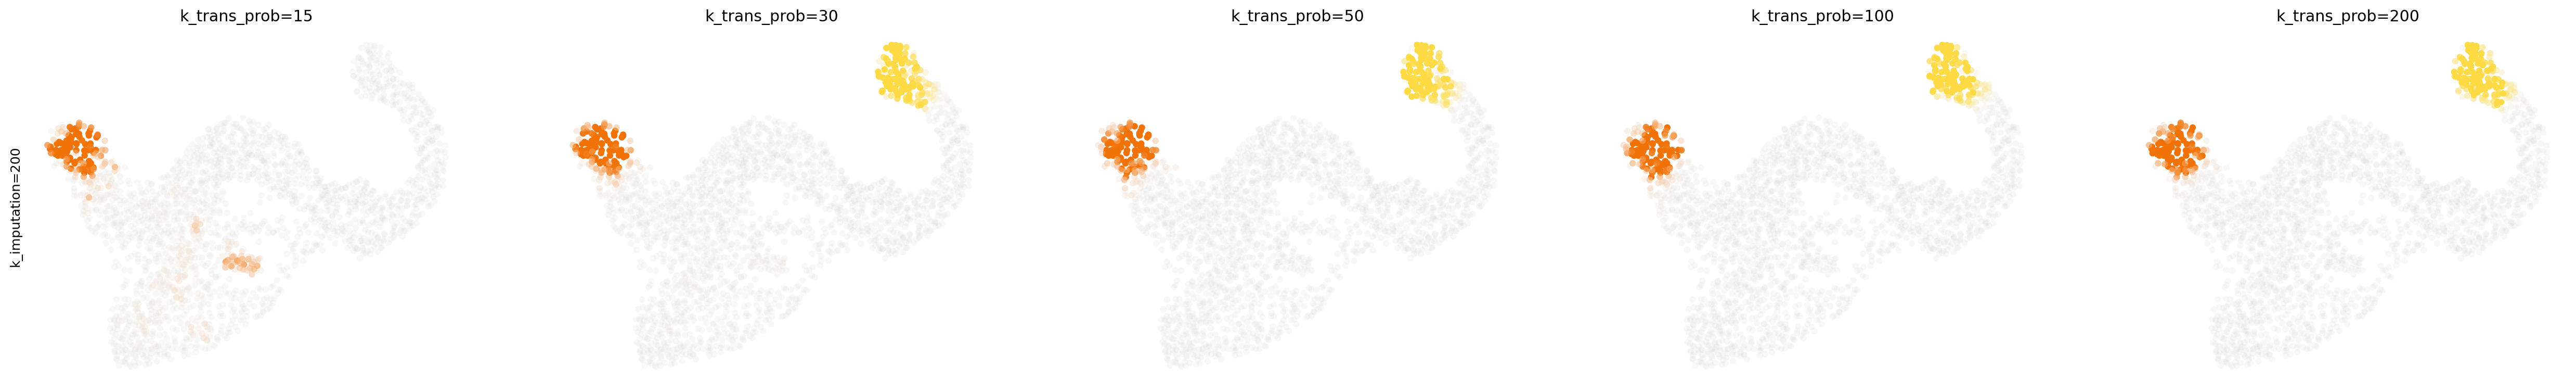

In [6]:
plot(lns, only_imp_200=True, figsize=(35, 5), fname=FIG_DIR / "velocyto_grid_imputation_200.png")

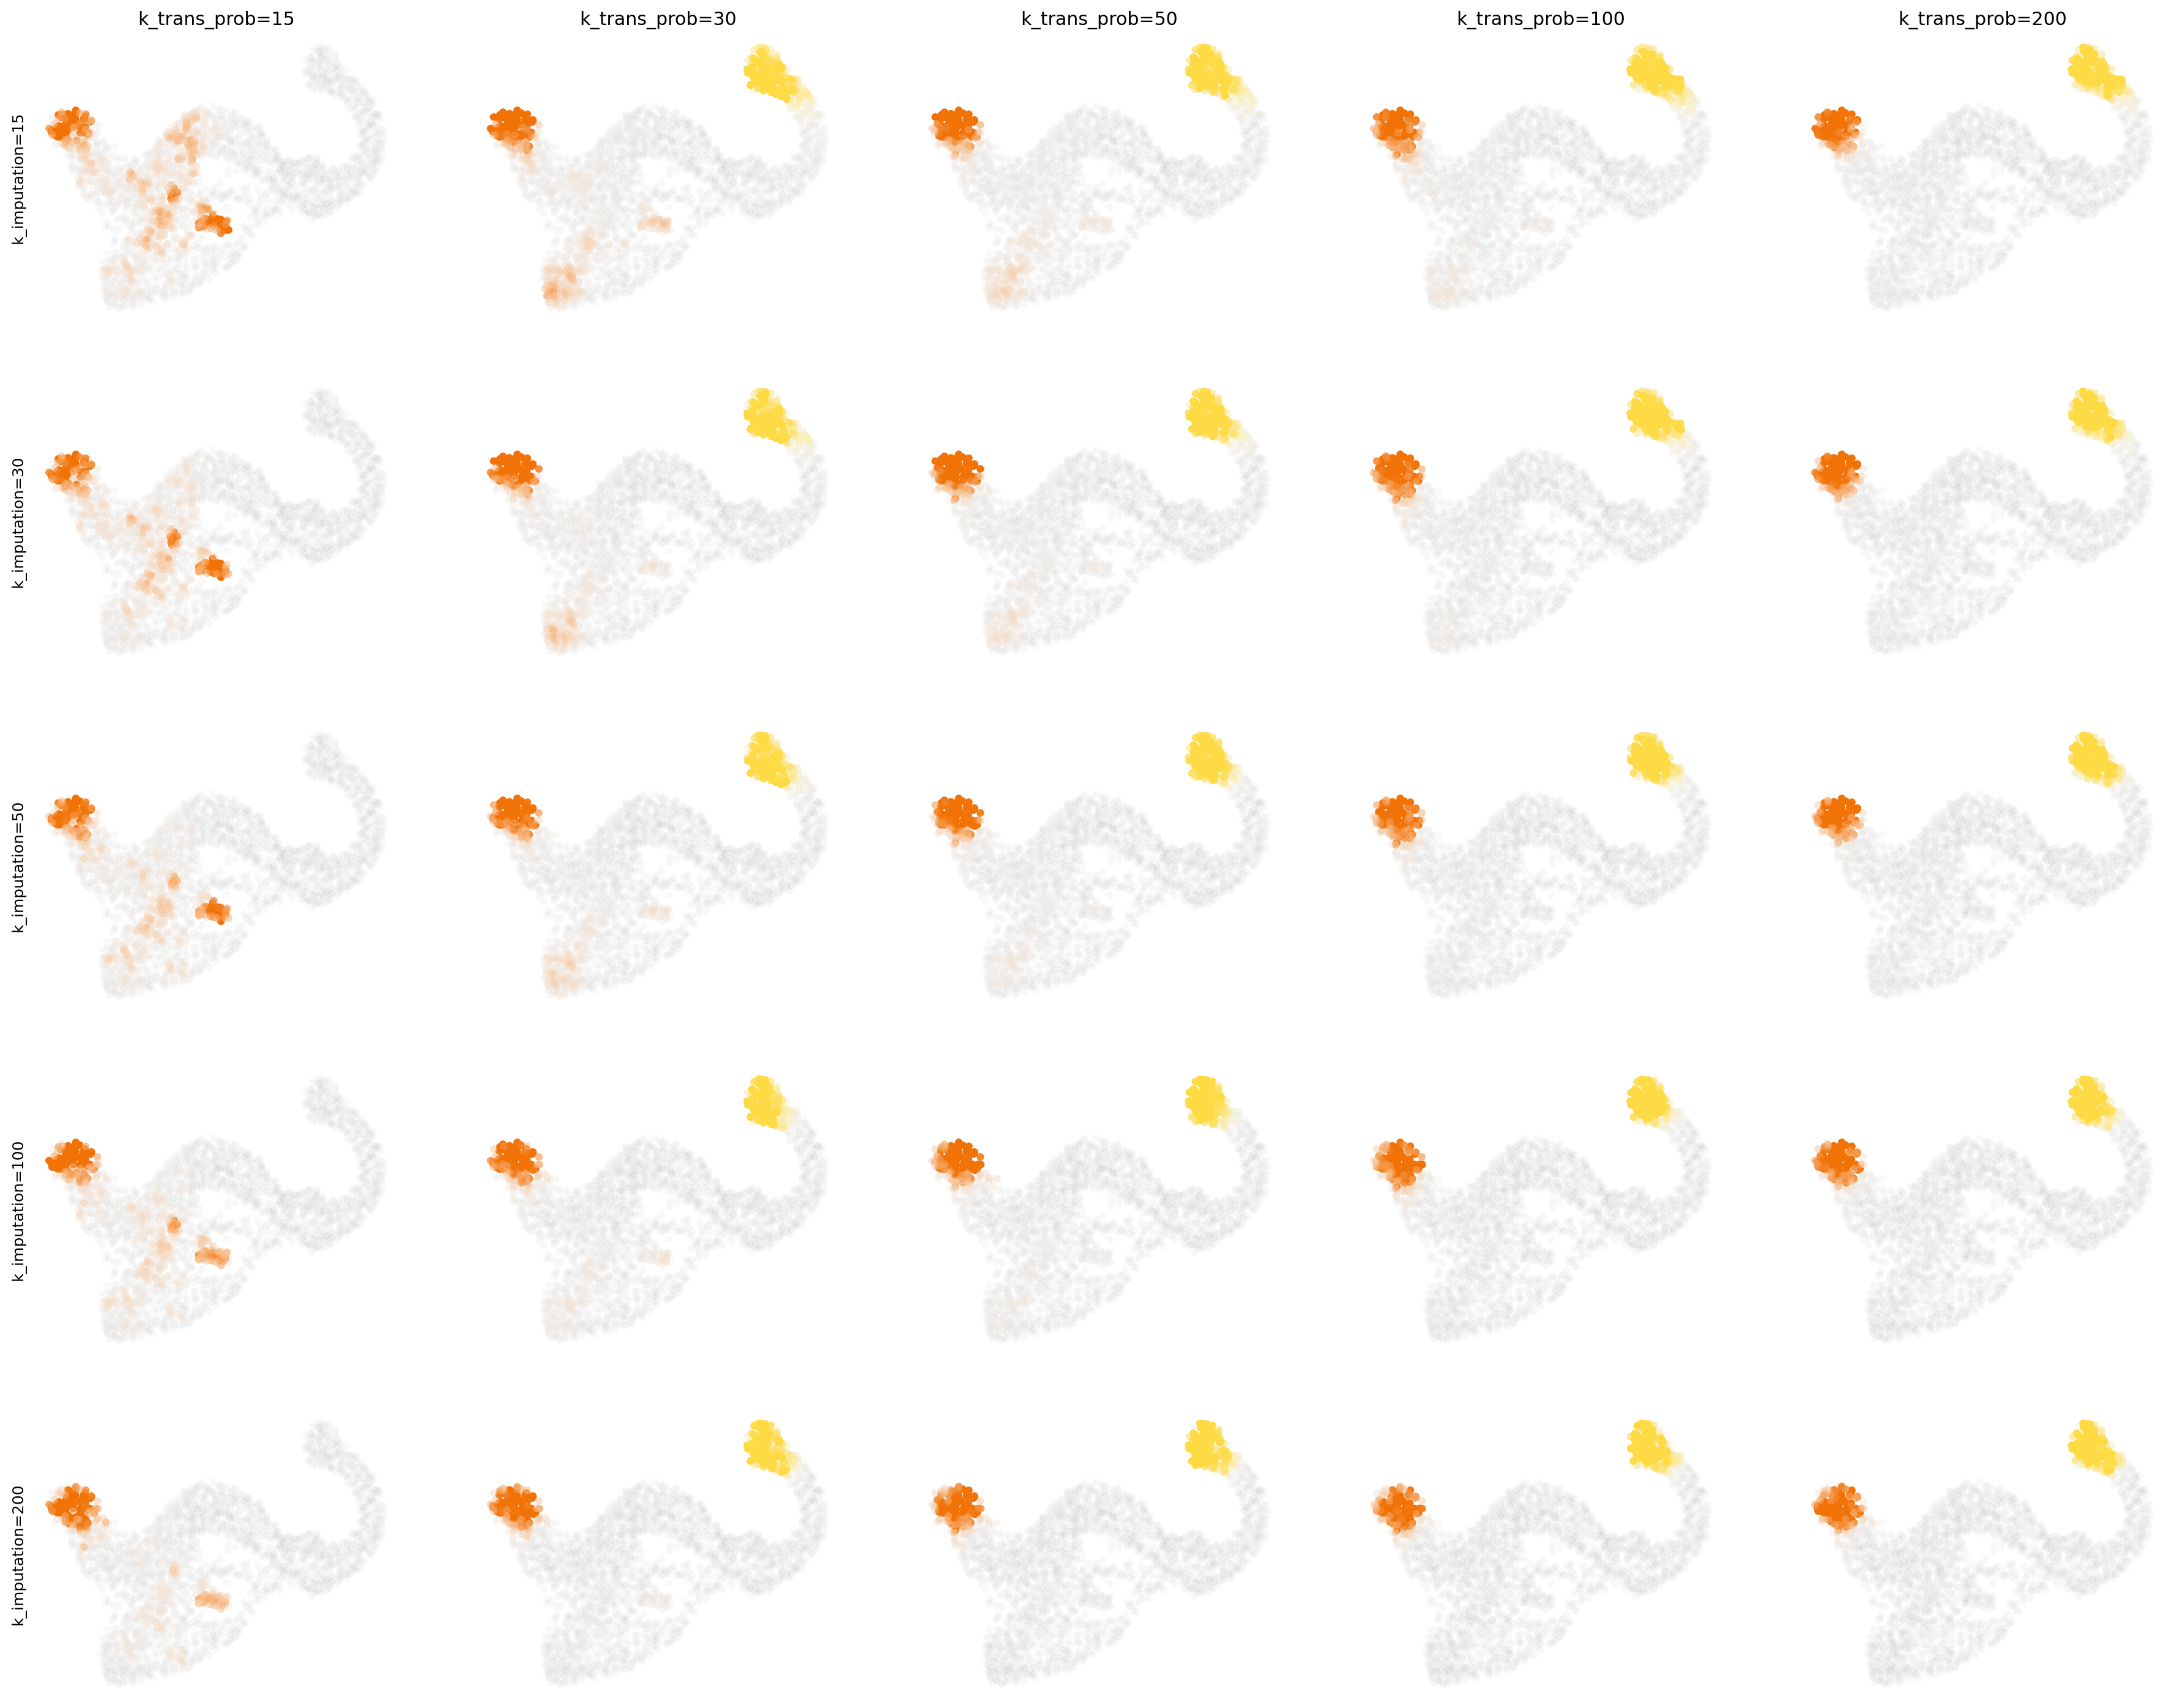

In [7]:
plot(lns, fname=FIG_DIR / "velocyto_grid_all.png")